# XGBoost Implementation

In [31]:
from sklearn.datasets import load_boston
from sklearn.metrics import mean_squared_error
from sklearn.model_selection import train_test_split
import numpy as np
import pandas as pd
import xgboost as xgb
import matplotlib.pyplot as plt

In [10]:
boston = load_boston()

In [11]:
data = pd.DataFrame(boston.data)
data.columns = boston.feature_names
data['PRICE'] = boston.target

In [12]:
data.head()

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT,PRICE
0,0.00632,18.0,2.31,0.0,0.538,6.575,65.2,4.0900,1.0,296.0,15.3,396.90,4.98,24.0
1,0.02731,0.0,7.07,0.0,0.469,6.421,78.9,4.9671,2.0,242.0,17.8,396.90,9.14,21.6
2,0.02729,0.0,7.07,0.0,0.469,7.185,61.1,4.9671,2.0,242.0,17.8,392.83,4.03,34.7
3,0.03237,0.0,2.18,0.0,0.458,6.998,45.8,6.0622,3.0,222.0,18.7,394.63,2.94,33.4
4,0.06905,0.0,2.18,0.0,0.458,7.147,54.2,6.0622,3.0,222.0,18.7,396.90,5.33,36.2


In [13]:
X, y = data.iloc[:, :-1], data.iloc[:, -1]

In [17]:
data_dmatrix = xgb.DMatrix(data = X, label = y)

In [24]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state = 123)
xg_reg = xgb.XGBRegressor(
                                                 objective = 'reg:linear',
                                                 colsample_bytree = 0.3,
                                                 learning_rate = 0.1,
                                                 max_depth = 5,
                                                 alpha = 10,
                                                 n_estimators = 10
                                                 )

xg_reg.fit(X_train, y_train)
preds = xg_reg.predict(X_test)

In [28]:
rmse = np.sqrt(mean_squared_error(y_test, preds))
print(rmse)

10.569356106561317


## K-fold cross validation

In [25]:
params = { 
                    "objective": "reg:linear",
                    "colsample_bytree": 0.3, 
                    "learning_rate": 0.1, 
                    "max_depth": 5,
                    "alpha": 10 
                    }

In [29]:
cv_results = xgb.cv(
                                    dtrain = data_dmatrix,
                                    params = params,
                                    nfold = 3,
                                    num_boost_round = 50,
                                    early_stopping_rounds = 10,
                                    metrics = "rmse",
                                    as_pandas = True,
                                    seed = 123
                                   )

[00:24:34] src/tree/updater_prune.cc:74: tree pruning end, 1 roots, 6 extra nodes, 0 pruned nodes, max_depth=2
[00:24:34] src/tree/updater_prune.cc:74: tree pruning end, 1 roots, 8 extra nodes, 0 pruned nodes, max_depth=3
[00:24:34] src/tree/updater_prune.cc:74: tree pruning end, 1 roots, 6 extra nodes, 0 pruned nodes, max_depth=2
[00:24:34] src/tree/updater_prune.cc:74: tree pruning end, 1 roots, 4 extra nodes, 0 pruned nodes, max_depth=2
[00:24:34] src/tree/updater_prune.cc:74: tree pruning end, 1 roots, 4 extra nodes, 0 pruned nodes, max_depth=2
[00:24:34] src/tree/updater_prune.cc:74: tree pruning end, 1 roots, 10 extra nodes, 0 pruned nodes, max_depth=3
[00:24:34] src/tree/updater_prune.cc:74: tree pruning end, 1 roots, 8 extra nodes, 0 pruned nodes, max_depth=3
[00:24:34] src/tree/updater_prune.cc:74: tree pruning end, 1 roots, 8 extra nodes, 0 pruned nodes, max_depth=3
[00:24:34] src/tree/updater_prune.cc:74: tree pruning end, 1 roots, 6 extra nodes, 0 pruned nodes, max_depth=3


In [39]:
# Apply gridsearch
cv_results

,train-rmse-mean,train-rmse-std,test-rmse-mean,test-rmse-std
0,21.652929,0.038265,21.670777,0.072370
1,19.738333,0.096609,19.779678,0.022114
2,17.985390,0.118165,18.077799,0.072427
3,16.475791,0.114712,16.585961,0.104928
4,14.996753,0.104662,15.151255,0.104449
5,13.692210,0.092569,13.872023,0.069879
6,12.536533,0.108544,12.728510,0.086579
7,11.550012,0.095455,11.776664,0.112484
8,10.646224,0.105331,10.907791,0.110330
9,9.785596,0.079571,10.090793,0.056386


## Visualize Boosting Trees

In [32]:
xg_reg = xgb.train(
                                params = params,
                                dtrain = data_dmatrix,
                                num_boost_round = 10
                                )

[00:27:52] src/tree/updater_prune.cc:74: tree pruning end, 1 roots, 8 extra nodes, 0 pruned nodes, max_depth=3
[00:27:52] src/tree/updater_prune.cc:74: tree pruning end, 1 roots, 10 extra nodes, 0 pruned nodes, max_depth=4
[00:27:52] src/tree/updater_prune.cc:74: tree pruning end, 1 roots, 10 extra nodes, 0 pruned nodes, max_depth=4
[00:27:52] src/tree/updater_prune.cc:74: tree pruning end, 1 roots, 14 extra nodes, 0 pruned nodes, max_depth=4
[00:27:52] src/tree/updater_prune.cc:74: tree pruning end, 1 roots, 14 extra nodes, 0 pruned nodes, max_depth=4
[00:27:52] src/tree/updater_prune.cc:74: tree pruning end, 1 roots, 8 extra nodes, 0 pruned nodes, max_depth=3
[00:27:52] src/tree/updater_prune.cc:74: tree pruning end, 1 roots, 16 extra nodes, 0 pruned nodes, max_depth=5
[00:27:52] src/tree/updater_prune.cc:74: tree pruning end, 1 roots, 22 extra nodes, 0 pruned nodes, max_depth=5
[00:27:52] src/tree/updater_prune.cc:74: tree pruning end, 1 roots, 14 extra nodes, 0 pruned nodes, max_de

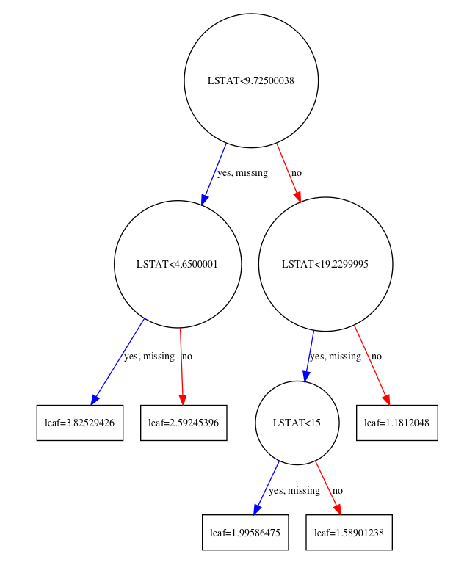

In [38]:
xgb.plot_tree(xg_reg, num_trees = 0)
plt.rcParams['figure.figsize'] = [50, 25]
plt.show()

## Feature importances

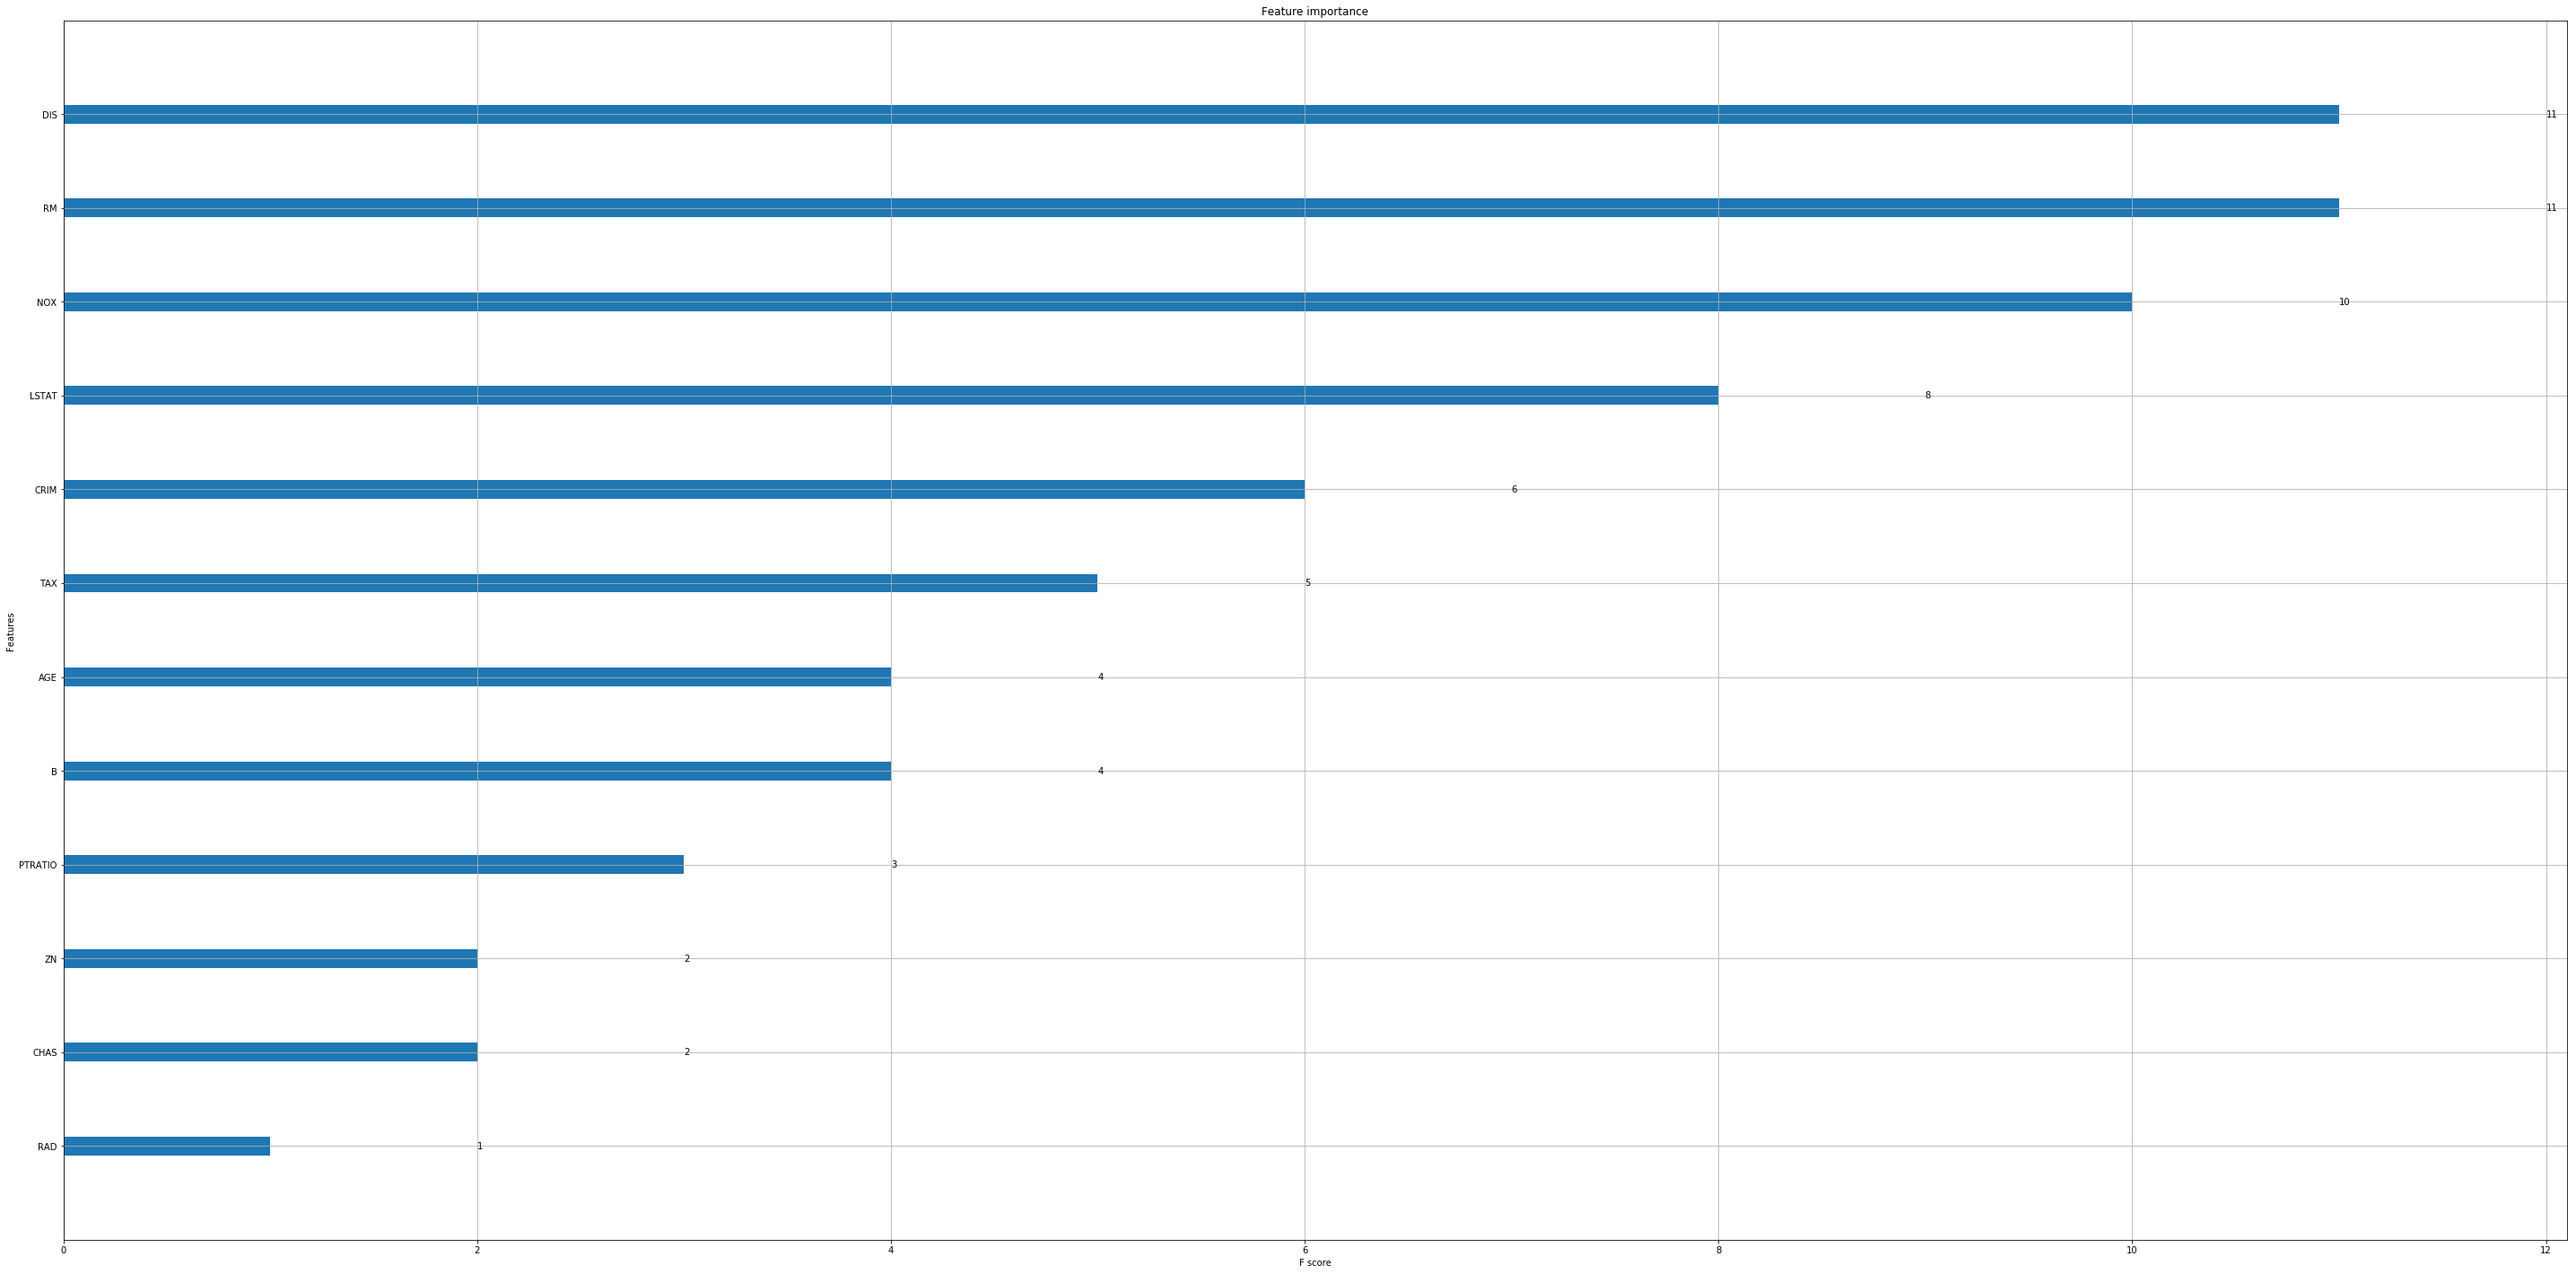

In [40]:
xgb.plot_importance(xg_reg)
plt.rcParams['figure.figsize'] = [5, 5]
plt.show()